In [1]:
# Import
import numpy as np
import scipy
import matplotlib.pylab as plt
from deepdish.io import load as ddload
from scipy import interpolate
dimpar = ddload('bwh_set4.hdf5')['dimpar']
#print(scipy.__version__)
%matplotlib inline

In [2]:
data = np.loadtxt("bwh_Turing_prec_to_chi_for_betas.dat")
chi = data[0]
beta0_2 = data[1]
beta0_5 = data[2]
beta1   = data[3]
beta2   = data[4]
beta5   = data[5]
conv_P = 234.55331200683514
tckbeta0_2 = interpolate.splrep(chi, beta0_2)
tckbeta0_5 = interpolate.splrep(chi, beta0_5)
tckbeta1   = interpolate.splrep(chi, beta1)
tckbeta2   = interpolate.splrep(chi, beta2)
tckbeta5   = interpolate.splrep(chi, beta5)

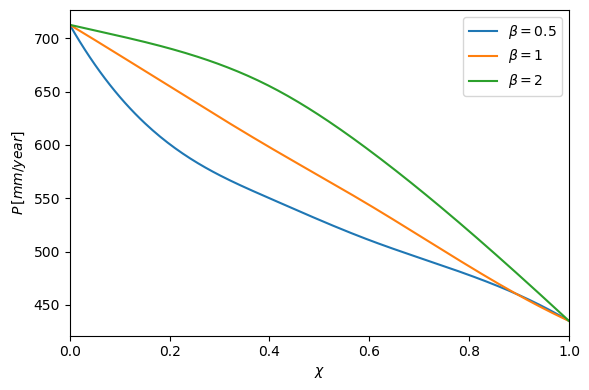

In [3]:
# Plot Turing prec to chi
fig = plt.figure(dpi=100)
chinew = np.linspace(0, 1, 200)
der = 0
#plt.plot(chi,conv_P*beta0_2,label=r'$\beta=0.2$')
#plt.plot(chi,conv_P*beta0_5,label=r'$\beta=0.5$')
#plt.plot(chi,conv_P*beta1,label=r'$\beta=1$')
#plt.plot(chi,conv_P*beta2,label=r'$\beta=2$')
#plt.plot(chi,conv_P*beta5,label=r'$\beta=5$')
#plt.plot(chinew,conv_P*interpolate.splev(chinew, tckbeta0_2, der=der),label=r'$\beta=0.2$')
plt.plot(chinew,conv_P*interpolate.splev(chinew, tckbeta0_5, der=der),label=r'$\beta=0.5$')
plt.plot(chinew,conv_P*interpolate.splev(chinew, tckbeta1, der=der),label=r'$\beta=1$')
plt.plot(chinew,conv_P*interpolate.splev(chinew, tckbeta2, der=der),label=r'$\beta=2$')
#plt.plot(chinew,conv_P*interpolate.splev(chinew, tckbeta5, der=der),label=r'$\beta=5$')
plt.ylabel(r'$P\,[mm/year]$')
plt.xlabel(r'$\chi$')
plt.xlim([0,1])
plt.legend(loc="best")
plt.tight_layout()
plt.savefig('bwh_Turing_prec_to_chi_for_betas.png')
plt.savefig('bwh_Turing_prec_to_chi_for_betas.pdf')

In [3]:
# Define trade-off functions
Q_min   = dimpar['Q']*(1.0-dimpar['del_to'])
Q_max   = dimpar['Q']*(1.0+dimpar['del_to'])
E_min = dimpar['E']*(1.0-dimpar['del_to'])
E_max = dimpar['E']*(1.0+dimpar['del_to'])
K_min   = dimpar['K']*(1.0-dimpar['del_to'])
K_max   = dimpar['K']*(1.0+dimpar['del_to'])
def E_chi(chi,beta):
    return K_max + (chi**beta)*(K_min-K_max)

def Q_chi(chi,beta):
    return Q_max + (chi**beta)*(Q_min-Q_max)

def K_chi(chi,beta):
    return E_max + ((1.0-chi)**beta)*(E_min-E_max)

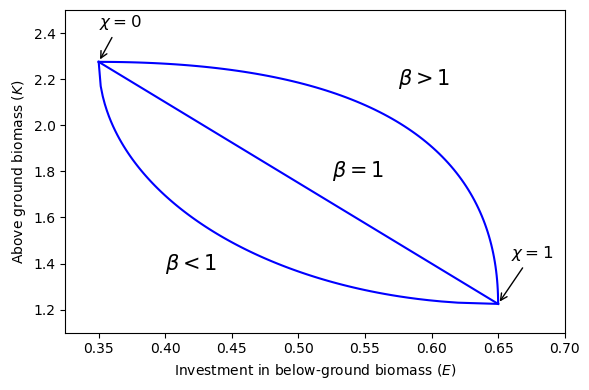

In [26]:
# Plotting trade-off
fig,ax=plt.subplots(1,1,dpi=100)
chi = np.linspace(0,1,100)
#f, (ax1,ax2,ax3) = plt.subplots(3)
#f,ax3 = plt.subplots(1)
#plt.ylim([K_min,K_max])
#plt.xlim([E_min,E_max])
E = E_chi(chi,1.0)
K = K_chi(chi,1.0)
plt.plot(E,K,'b')

E = E_chi(chi,2)
K = K_chi(chi,2)
plt.plot(E,K,'b')

E = E_chi(chi,0.5)
K = K_chi(chi,0.5)
plt.plot(E,K,'b')
plt.ylabel(r'Above ground biomass ($K$)')
plt.xlabel(r'Investment in below-ground biomass ($E$)')
plt.locator_params(axis='y',nbins=8)
#plt.axvline(0,color='r',ls='--',label=r'$M_{min}$')
#plt.axvline(par['mu_s_max']*dimpar['M0'],color='b',ls='--',label=r'$M_{max}$')
#plt.axhline(dimpar['Lambda_min'],color='m',ls=':',label=r'$\Lambda_{min}$')
#plt.axhline(dimpar['Lambda_max'],color='b',ls=':',label=r'$\Lambda_{max}$')
plt.text(0.525,1.8,r"$\beta = 1$".format(1.0),size=15.0,
        verticalalignment="center",horizontalalignment="left")
#r"$\beta = {:3.2}$"
plt.text(0.575,2.2,r"$\beta > 1$".format(1.4),size=15.0,
        verticalalignment="center",horizontalalignment="left")
plt.text(0.40,1.4,r"$\beta < 1 $".format(0.6),size=15.0,
        verticalalignment="center",horizontalalignment="left")
plt.annotate(r"$\chi=0$",
            xy=(min(E),max(K)), xycoords='data',
            xytext=(min(E),max(K)+0.15), textcoords='data',
            size=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.annotate(r"$\chi=1$",
            xy=(max(E),min(K)), xycoords='data',
            xytext=(max(E)+0.01,min(K)+0.2), textcoords='data',
            size=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.ylim([1.1,2.5])
plt.xlim([0.325,0.7])
plt.tight_layout()
plt.savefig("tradeoff_axis.pdf")
plt.savefig("tradeoff_axis.png")
plt.savefig("tradeoff_axis.svg")

In [ ]:
x = [min(Ms),max(Ms)]
y = [dimpar['Lambda_min'],dimpar['Lambda_max']]
labelsx = [r'$M_{s,min}$', r'$M_{s,max}$']
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(x, labelsx,fontsize=12) #,rotation='vertical')
labelsy = [r'$\Lambda_{min}$', r'$\Lambda_{max}$']
plt.yticks(y, labelsy,fontsize=12)
plt.ylabel(r'$\Lambda$')
plt.xlabel(r'$M_s$')
#ax3.legend(loc="upper right")

plt.text(2.5,0.375,r"$\beta = 1$".format(1.0),size=15.0,
        verticalalignment="center",horizontalalignment="left")
#r"$\beta = {:3.2}$"
plt.text(5.0,0.39,r"$\beta > 1$".format(1.4),size=15.0,
        verticalalignment="center",horizontalalignment="left")
plt.text(1.8,0.36,r"$\beta < 1 $".format(0.6),size=15.0,
        verticalalignment="center",horizontalalignment="left")
plt.annotate(r"$\chi=0$",
            xy=(min(Ms),dimpar['Lambda_max']), xycoords='data',
            xytext=(min(Ms),dimpar['Lambda_max']+0.005), textcoords='data',
            size=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.annotate(r"$\chi=1$",
            xy=(max(Ms),dimpar['Lambda_min']), xycoords='data',
            xytext=(max(Ms),dimpar['Lambda_min']+0.02), textcoords='data',
            size=12,
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )